<a href="https://colab.research.google.com/github/TuanLBT/AI_learning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import fashion_mnist

In [ ]:
(train_x,train_y), (test_x,test_y) = fashion_mnist.load_data()

In [ ]:
train_x.shape

(60000, 28, 28)

In [ ]:
train_y.shape

(60000,)

In [ ]:
test_x.shape

(10000, 28, 28)

In [ ]:
test_y.shape

(10000,)

Text(0.5, 1.0, 'So:8')

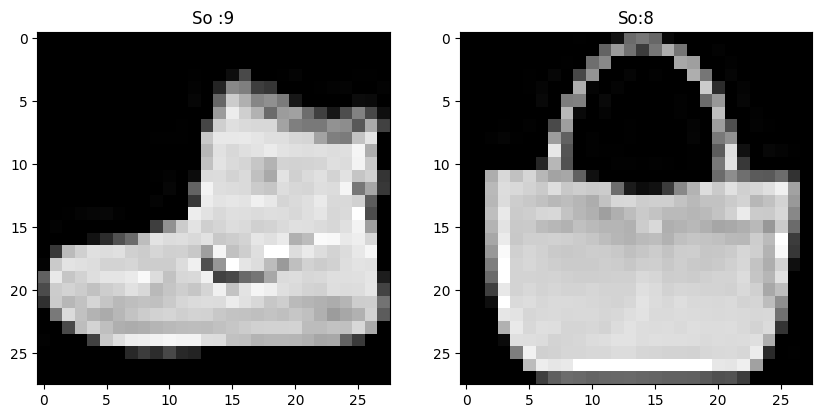

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,10])
plt.subplot(121)
plt.imshow(train_x[0],cmap='gray') #[0]:hien thi tat ca
plt.title('So :{}'.format(train_y[0]))
plt.subplot(122)
plt.imshow(train_x[100],cmap='gray')
plt.title('So:{}'.format(train_y[100]))

reshape lai 60000 anh va 10000 anh

In [ ]:
train_x = train_x.reshape(60000,28,28,1)
test_x = test_x.reshape(10000,28,28,1)


In [ ]:
train_x.shape

(60000, 28, 28, 1)

In [ ]:
test_x.shape

(10000, 28, 28, 1)

In [ ]:
train_x = train_x.astype('float32')
train_x = train_x/255

In [ ]:
test_x = test_x.astype('float32')
test_x = test_x/255

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(train_y)
y_test = to_categorical(test_y)

tao mo hinh

In [ ]:
from keras import Sequential,Model,Input
from keras.layers import Dense,Flatten,Dropout, Conv2D, MaxPooling2D,Normalization
from keras.optimizers import Adam

In [ ]:
batch_size = 64
epochs = 20
classes = 10

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(28,28,1),padding='same'))  #Conv2D(so lan nhan tich chap,kichthuoc boloc)

In [ ]:
from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))


model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

dua vao bo CNN

In [ ]:
model.add(Flatten()) #Tự động lấy ảnh thành 1 cái vector, vì sau khi nhân tích chập ta ko biết kích thước ntn
#sau đó đưa vector đó qua một mạng đã học là mạng ANN, để quyết định phân loại nó là loại gì 


mang ANN de phan loai

In [ ]:
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))

In [ ]:
from keras.backend import categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics =['accuracy'])

In [ ]:
train = model.fit(train_x,y_train,batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/20
938/938 [==============================] - 120s 127ms/step - loss: 0.4461 - accuracy: 0.8367
Epoch 2/20
938/938 [==============================] - 118s 126ms/step - loss: 0.2754 - accuracy: 0.8994
Epoch 3/20
938/938 [==============================] - 114s 122ms/step - loss: 0.2286 - accuracy: 0.9158
Epoch 4/20
938/938 [==============================] - 116s 124ms/step - loss: 0.1965 - accuracy: 0.9273
Epoch 5/20
938/938 [==============================] - 116s 123ms/step - loss: 0.1716 - accuracy: 0.9360
Epoch 6/20
938/938 [==============================] - 117s 125ms/step - loss: 0.1489 - accuracy: 0.9452
Epoch 7/20
938/938 [==============================] - 119s 127ms/step - loss: 0.1291 - accuracy: 0.9510
Epoch 8/20
938/938 [==============================] - 117s 125ms/step - loss: 0.1120 - accuracy: 0.9581
Epoch 9/20
938/938 [==============================] - 117s 124ms/step - loss: 0.0924 - accuracy: 0.9646
Epoch 10/20
938/938 [==============================] - 116s 124m

In [ ]:
model.save('/content/drive/MyDrive/CNN.h5')

In [ ]:
eval = model.evaluate(test_x,y_test,verbose=0)
print('test loss:',eval[0])
print('test accuracy:',eval[1])



test loss: 0.4174403250217438
test accuracy: 0.9214000105857849


Text(0.5, 1.0, 'Training and Testing Accuracy')

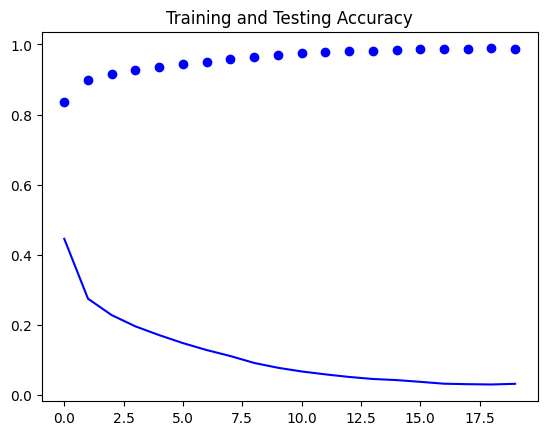

In [ ]:
accuracy = train.history['accuracy']
val_accuracy=train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'bo',label='Training Accurracy')
plt.plot(epochs,val_accuracy,'b',label='Test Accuracy')
plt.title('Training and Testing Accuracy')
